# Table of Contents

In [40]:
import pandas as pd
import os
import pickle
import matplotlib.pyplot as plt

## 파일, 변수 리스트

- 경쟁사이용: competitor
- 고객DOMO: demo
- 구매상품 TR: purprd
- 멤머십여부: member
- 상품분류: prodcl
- 채널이용: channel
- 분류: clf
- 분류로직: clf_logic

In [2]:
file_list = os.listdir('../../data')
sorted(file_list)

['경쟁사이용.txt',
 '고객DEMO.txt',
 '구매상품TR.txt',
 '멤버십여부.txt',
 '분류.docx',
 '분류.txt',
 '분류로직.csv',
 '분류로직.xlsx',
 '상품분류.txt',
 '채널이용.txt']

### 1. 경쟁사이용

In [3]:
# 경쟁사이용
competitor = pd.read_csv('../../data/경쟁사이용.txt', encoding='cp949')
competitor

,고객번호,제휴사,경쟁사,이용년월
0,2,D,D02,201507
1,51,D,D01,201504
2,77,D,D02,201503
3,77,D,D02,201506
4,77,D,D02,201507
...,...,...,...,...
28154,19375,B,B01,201501
28155,19375,B,B01,201507
28156,19375,C,C03,201511
28157,19376,B,B01,201506


### 2. 고객DEMO

In [4]:
# 고객DEMO
demo = pd.read_csv('../../data/고객DEMO.txt', encoding='cp949')
demo

,고객번호,성별,연령대,거주지역
0,1,M,60세이상,60.0
1,2,M,60세이상,100.0
2,3,M,60세이상,33.0
3,4,F,60세이상,16.0
4,5,M,60세이상,100.0
...,...,...,...,...
19378,19379,F,20세~24세,69.0
19379,19380,F,20세~24세,39.0
19380,19381,F,40세~44세,460.0
19381,19382,F,45세~49세,460.0


In [5]:
demo.연령대.value_counts()

45세~49세    4082
40세~44세    3677
50세~54세    3114
35세~39세    2769
55세~59세    1774
30세~34세    1679
60세이상      1303
25세~29세     685
20세~24세     283
19세이하        17
Name: 연령대, dtype: int64

### 3. 구매상품TR

In [12]:
# 구매상품TR
purprd = pd.read_csv('../../data/구매상품TR.txt', encoding='cp949')
purprd

,제휴사,영수증번호,대분류코드,중분류코드,소분류코드,고객번호,점포코드,구매일자,구매시간,구매금액
0,B,8664000,15,1504,B150401,17218,44,20140222,20,2420
1,B,8664000,16,1601,B160101,17218,44,20140222,20,1070
2,B,8664000,16,1602,B160201,17218,44,20140222,20,8060
3,B,8664000,18,1803,B180301,17218,44,20140222,20,6000
4,B,8664001,5,509,B050901,17674,44,20140222,22,1120
...,...,...,...,...,...,...,...,...,...,...
28593025,B,8116737,37,3709,B370904,7439,29,20150525,19,14000
28593026,B,8116738,37,3709,B370904,16421,29,20150525,20,6500
28593027,B,8116739,8,802,B080203,8266,29,20150525,13,16000
28593028,B,8116764,90,9001,B900103,14316,29,20150526,19,1000


In [13]:
purprd_mer = pd.merge(purprd, prodcl, how='inner', on=['제휴사','대분류코드','중분류코드','소분류코드'])
purprd_mer

,제휴사,영수증번호,대분류코드,중분류코드,소분류코드,고객번호,점포코드,구매일자,구매시간,구매금액,중분류명,소분류명
0,B,8664000,15,1504,B150401,17218,44,20140222,20,2420,탄산음료,사이다
1,B,8664007,15,1504,B150401,11303,44,20140222,13,2400,탄산음료,사이다
2,B,8919520,15,1504,B150401,13210,48,20150921,19,5250,탄산음료,사이다
3,B,6956422,15,1504,B150401,13823,12,20140813,18,2250,탄산음료,사이다
4,B,6957156,15,1504,B150401,18970,12,20140831,22,4900,탄산음료,사이다
...,...,...,...,...,...,...,...,...,...,...,...,...
28593025,B,7269975,14,1415,B141503,134,16,20141130,15,8900,전통과자,온라인팥빙수재료
28593026,B,7946814,68,6802,B680209,18484,26,20141227,14,1000,여성양말,여성발가락
28593027,B,7777110,7,702,B070203,5043,21,20151012,22,4510,즉석구이안주,즉석쥐포
28593028,B,7579178,7,703,B070305,4073,18,20140125,20,8900,마른안주,온라인 안주


#### 반기별 매출

In [14]:
#2014 상반기
purprd_mer[purprd_mer.구매일자<20140701].구매금액.sum()
#2014 하반기
purprd_mer[(purprd_mer.구매일자>=20140701)&(purprd_mer.구매일자<20150101)].구매금액.sum()
#2015 상반기
purprd_mer[(purprd_mer.구매일자>=20150101)&(purprd_mer.구매일자<20150701)].구매금액.sum()
#2015 하반기
purprd_mer[(purprd_mer.구매일자>=20150701)&(purprd_mer.구매일자<20160101)].구매금액.sum()

178128166215

### 4. 멤버십여부

In [15]:
# 멤버심 여부
member = pd.read_csv('../../data/멤버십여부.txt', encoding='cp949')
member

,고객번호,멤버십명,가입년월
0,11,하이마트,201512
1,21,하이마트,201506
2,37,하이마트,201306
3,43,하이마트,201403
4,44,하이마트,201411
...,...,...,...
7451,19377,롭스,201411
7452,19379,롭스,201412
7453,19380,롭스,201412
7454,19381,다둥이,201506


### 5. 상품분류

In [16]:
# 상품분류
prodcl = pd.read_csv('../../data/상품분류.txt', encoding='cp949')
prodcl

,제휴사,대분류코드,중분류코드,소분류코드,중분류명,소분류명
0,A,1,101,A010101,일용잡화,위생세제
1,A,1,101,A010102,일용잡화,휴지류
2,A,1,101,A010103,일용잡화,뷰티상품
3,A,1,101,A010104,일용잡화,일용잡화
4,A,1,101,A010105,일용잡화,세트상품
...,...,...,...,...,...,...
4381,D,8,802,D080204,아이메이크업,아이섀도우
4382,D,8,802,D080205,아이메이크업,메이크업세트
4383,D,8,803,D080301,립메이크업,립스틱/립라이너
4384,D,8,803,D080302,립메이크업,립글로즈/틴트


### 6. 채널이용

In [19]:
# 채널이용
# 이용횟수 = 최근 3개월간 방문횟수
# 기준이 20151231 인가?
channel = pd.read_csv('../../data/채널이용.txt', encoding='cp949')
channel

,고객번호,제휴사,이용횟수
0,7,A_MOBILE/APP,4
1,14,A_MOBILE/APP,1
2,42,B_MOBILE/APP,23
3,74,A_MOBILE/APP,1
4,74,B_MOBILE/APP,30
...,...,...,...
8819,19168,C_ONLINEMALL,18
8820,19291,C_ONLINEMALL,1
8821,19312,B_ONLINEMALL,137
8822,19351,C_ONLINEMALL,19


In [20]:
channel.제휴사.value_counts()

B_MOBILE/APP    5170
A_MOBILE/APP    1435
B_ONLINEMALL    1328
C_ONLINEMALL     618
D_MOBILE/APP     227
C_MOBILE/APP      46
Name: 제휴사, dtype: int64

### 7. 분류

In [21]:
clf = pd.read_csv('../../data/분류.txt', encoding='cp949')
clf

,CAT,CATEGORY,TYPE
0,A01가공식품,식품,일용품
1,A01건강식품,식품,선매품
2,A01기타,멀티샵,일용품
3,A01농산물,식품,일용품
4,A01수산품,식품,일용품
...,...,...,...
801,D07여성,이미용,일용품
802,D08네일메이크업,이미용,일용품
803,D08립메이크업,이미용,일용품
804,D08베이스메이크업,이미용,일용품


### 8. 분류로직

In [22]:
clf_logic = pd.read_csv('../../data/분류로직.csv', encoding='cp949')
clf_logic

,CAT,CATEGORY,UPRICE,QTY,AVG,AVGVS,LEV
0,A01가공식품,식품,14650,1260715,7926,1.8,중가
1,A01건강식품,식품,139926,53366,7926,17.7,고가
2,A01기타,멀티샵,96379,649,96379,1.0,중가
3,A01농산물,식품,15090,820228,7926,1.9,중가
4,A01수산품,식품,30602,199657,7926,3.9,고가
...,...,...,...,...,...,...,...
801,D07여성,이미용,48304,400,54507,0.9,중가
802,D08네일메이크업,이미용,10981,824,54507,0.2,저가
803,D08립메이크업,이미용,17839,1925,54507,0.3,저가
804,D08베이스메이크업,이미용,25196,1371,54507,0.5,저가


# 메인 데이터

## 

In [78]:
purprd_prodcl[purprd_prodcl.중분류명=='두채류']

,제휴사,영수증번호,대분류코드,중분류코드,소분류코드,고객번호,점포코드,구매일자,구매시간,구매금액,중분류명,소분류명
5426843,C,9,3,304,C030401,10628,1,20140101,18,1280,두채류,두부류
5426849,C,11,3,304,C030401,7352,1,20140101,19,3980,두채류,두부류
5426850,C,11,3,304,C030404,7352,1,20140101,19,2000,두채류,콩나물
5426865,C,14,3,304,C030404,10040,1,20140101,14,1590,두채류,콩나물
5671291,C,17,3,304,C030404,1000,1,20140101,15,1950,두채류,콩나물
...,...,...,...,...,...,...,...,...,...,...,...,...
349234,C,11082693,3,304,C030404,18793,387,20150819,17,1480,두채류,콩나물
349259,C,11082701,3,304,C030401,18793,387,20150828,18,1500,두채류,두부류
711031,C,11082735,3,304,C030402,18793,387,20151004,14,1590,두채류,연두부류
711045,C,11082736,3,304,C030401,10294,387,20151004,17,1500,두채류,두부류


In [23]:
purprd_prodcl = pd.merge(purprd, prodcl, how='left')
purprd_prodcl = purprd_prodcl.sort_values(by='영수증번호')
purprd_prodcl

,제휴사,영수증번호,대분류코드,중분류코드,소분류코드,고객번호,점포코드,구매일자,구매시간,구매금액,중분류명,소분류명
5671370,C,1,6,605,C060503,2263,1,20140101,9,5950,기타조리식품,기타온장조리
5671371,C,2,15,1502,C150206,2263,1,20140101,12,1490,건면,기타건면
5671372,C,3,13,1307,C130703,18336,1,20140101,16,3980,즉석식품,즉석밥
5671373,C,4,1,101,C010104,18050,1,20140101,16,8990,국산과일,귤류
5671374,C,4,11,1102,C110201,18050,1,20140101,16,1100,탄산음료,탄산수
...,...,...,...,...,...,...,...,...,...,...,...,...
21740623,B,11096601,77,7706,B770601,6522,135,20151223,14,7900,규격RTC,찌개/탕(냉장)
21740624,B,11096601,79,7907,B790701,6522,135,20151223,14,27200,온라인해물연체,온라인해물연체류
12334107,B,11096601,73,7303,B730302,6522,135,20151223,14,4680,냉장간편식HMR,냉장간편식
21740618,B,11096601,73,7302,B730201,6522,135,20151223,14,10880,냉동HMR,냉동디저트HMR


In [ ]:
9,92,17,8

In [73]:
purprd_prodcl[(purprd_prodcl.대분류코드==1)&(purprd_prodcl.제휴사=='A')].중분류명.unique(),\
purprd_prodcl[(purprd_prodcl.대분류코드==2)&(purprd_prodcl.제휴사=='A')].중분류명.unique(),\
purprd_prodcl[(purprd_prodcl.대분류코드==3)&(purprd_prodcl.제휴사=='A')].중분류명.unique(),\
purprd_prodcl[(purprd_prodcl.대분류코드==4)&(purprd_prodcl.제휴사=='A')].중분류명.unique(),\
purprd_prodcl[(purprd_prodcl.대분류코드==5)&(purprd_prodcl.제휴사=='A')].중분류명.unique(),\
purprd_prodcl[(purprd_prodcl.대분류코드==6)&(purprd_prodcl.제휴사=='A')].중분류명.unique(),\
purprd_prodcl[(purprd_prodcl.대분류코드==7)&(purprd_prodcl.제휴사=='A')].중분류명.unique(),\
purprd_prodcl[(purprd_prodcl.대분류코드==8)&(purprd_prodcl.제휴사=='A')].중분류명.unique(),\
purprd_prodcl[(purprd_prodcl.대분류코드==9)&(purprd_prodcl.제휴사=='A')].중분류명.unique()

(array(['가공식품', '차/커피', '농산물', '주류', '젓갈/반찬', '수산품', '육류', '축산가공', '일용잡화',
        '건강식품', '기타'], dtype=object),
 array(['구두', '보석', '피혁잡화', '섬유잡화', '화장품', '액세서리', '준보석/시계'], dtype=object),
 array(['아동'], dtype=object),
 array(['캐주얼', '디자이너', '란제리/내의', '시티웨어', '트래디셔널', '모피/피혁', '커리어', '기타의류',
        '블라우스'], dtype=object),
 array(['트래디셔널', '남성 트랜디', '남성정장', '셔츠', '남성캐주얼', '교복'], dtype=object),
 array(['스포츠', '골프용품'], dtype=object),
 array(['주방가전', '소형가전', '통신/컴퓨터', '대형가전', '악기', '전자/전기'], dtype=object),
 array(['명품'], dtype=object),
 array(['문구/팬시', '주방용품', '식기', '생활잡화', '가구', '침구/수예', '웨딩'], dtype=object))

In [76]:
purprd_prodcl[(purprd_prodcl.대분류코드==1)&(purprd_prodcl.제휴사=='B')].중분류명.unique(),\
purprd_prodcl[(purprd_prodcl.대분류코드==2)&(purprd_prodcl.제휴사=='B')].중분류명.unique(),\
purprd_prodcl[(purprd_prodcl.대분류코드==3)&(purprd_prodcl.제휴사=='B')].중분류명.unique(),\
purprd_prodcl[(purprd_prodcl.대분류코드==4)&(purprd_prodcl.제휴사=='B')].중분류명.unique(),\
purprd_prodcl[(purprd_prodcl.대분류코드==5)&(purprd_prodcl.제휴사=='B')].중분류명.unique(),\
purprd_prodcl[(purprd_prodcl.대분류코드==6)&(purprd_prodcl.제휴사=='B')].중분류명.unique(),\ # 이거 손군집
purprd_prodcl[(purprd_prodcl.대분류코드==7)&(purprd_prodcl.제휴사=='B')].중분류명.unique(),\
purprd_prodcl[(purprd_prodcl.대분류코드==8)&(purprd_prodcl.제휴사=='B')].중분류명.unique(),\ # 편의시설 레스토랑 카페..
purprd_prodcl[(purprd_prodcl.대분류코드==9)&(purprd_prodcl.제휴사=='B')].중분류명.unique(),\
purprd_prodcl[(purprd_prodcl.대분류코드==10)&(purprd_prodcl.제휴사=='B')].중분류명.unique(),\
purprd_prodcl[(purprd_prodcl.대분류코드==11)&(purprd_prodcl.제휴사=='B')].중분류명.unique(),\
purprd_prodcl[(purprd_prodcl.대분류코드==12)&(purprd_prodcl.제휴사=='B')].중분류명.unique(),\
purprd_prodcl[(purprd_prodcl.대분류코드==13)&(purprd_prodcl.제휴사=='B')].중분류명.unique(),\
purprd_prodcl[(purprd_prodcl.대분류코드==14)&(purprd_prodcl.제휴사=='B')].중분류명.unique(),\
purprd_prodcl[(purprd_prodcl.대분류코드==15)&(purprd_prodcl.제휴사=='B')].중분류명.unique(),\
purprd_prodcl[(purprd_prodcl.대분류코드==16)&(purprd_prodcl.제휴사=='B')].중분류명.unique()

(array(['버섯', '열매채소', '온라인버섯/열매채소'], dtype=object),
 array(['조리반찬', '시즌반찬'], dtype=object),
 array(['포장반찬', '포장젓갈'], dtype=object),
 array(['양곡', '잡곡류', '즉석도정미', '가공양곡'], dtype=object),
 array(['잎채소', '샐러드채소', '뿌리채소', '약초', '버섯류', '양념류', '열매채소', '친환경채소',
        '김치채소', '샐러드/간편채소', 'LOCAL잎채소', 'LOCAL김치채소', '식자재', '온라인잎/샐러드채소'],
       dtype=object),
 array(['대중선어', '생선선물세트', '냉동수산물', '도미/민어', '고등어/삼치', '오징어', '국산게/갈치',
        '대구', '기타구색생선', '조기/명태', '꽁치/가자미'], dtype=object),
 array(['마른안주', '해조류', '멸치건명태', '선물세트', '조미오징어', '쥐치포', '육포', '건오징어',
        '마른안주선물세트', '특산물', '즉석구이안주'], dtype=object),
 array(['편의시설', '레스토랑', '판매시설', 'Fast Food', '카페', '주유소'], dtype=object),
 array(['베이커리', '피자', '간편조리', '튀김조리', '구이찜조리', '구이', '튀김', '브랜드조리', '간식조리',
        '대용식', '밥류', '이벤트조리', '반찬류'], dtype=object),
 array(['흰우유', '냉장음료', '요구르트', '가공우유', '유제품', '브랜드빵', '치즈', '유가공', '디저트',
        '데일리처분'], dtype=object),
 array(['소스류', '식용유지', '조미료', '가루', '장류', '조미선물세트', '수입조미', '소금/설탕류',
        '액상조미료'

In [45]:
purprd_prodcl[(purprd_prodcl.대분류코드==1)&(purprd_prodcl.제휴사=='C')].중분류명.unique()

array(['국산과일', '수입과일', '견과류', '냉동과일', '건과일'], dtype=object)

In [75]:
purprd_prodcl[(purprd_prodcl.대분류코드==1)&(purprd_prodcl.제휴사=='D')].중분류명.unique(),\
purprd_prodcl[(purprd_prodcl.대분류코드==2)&(purprd_prodcl.제휴사=='D')].중분류명.unique(),\
purprd_prodcl[(purprd_prodcl.대분류코드==3)&(purprd_prodcl.제휴사=='D')].중분류명.unique(),\
purprd_prodcl[(purprd_prodcl.대분류코드==4)&(purprd_prodcl.제휴사=='D')].중분류명.unique(),\
purprd_prodcl[(purprd_prodcl.대분류코드==5)&(purprd_prodcl.제휴사=='D')].중분류명.unique(),\
purprd_prodcl[(purprd_prodcl.대분류코드==6)&(purprd_prodcl.제휴사=='D')].중분류명.unique(),\
purprd_prodcl[(purprd_prodcl.대분류코드==7)&(purprd_prodcl.제휴사=='D')].중분류명.unique(),\
purprd_prodcl[(purprd_prodcl.대분류코드==8)&(purprd_prodcl.제휴사=='D')].중분류명.unique()

(array(['남성케어', '베이직케어', '집중케어', '클렌징', '선케어', '베이비케어'], dtype=object),
 array(['핸드/풋케어', '여성용품', '구강케어', '헤어케어', '바디케어'], dtype=object),
 array(['건강기능식품', '일반의약외품', '피트니스'], dtype=object),
 array(['음료', '과자'], dtype=object),
 array(['화장지/티슈', '방향/제습/탈취제', '기기'], dtype=object),
 array(['계절팩', '미용소품', '양말류', '전기용품', '여행용품', '안전용품', '우산/양산류', '파티/팬시용품'],
       dtype=object),
 array(['여성', '남성'], dtype=object),
 array(['베이스메이크업', '아이메이크업', '립메이크업', '네일메이크업'], dtype=object))

In [ ]:
purprd_prodcl.drop(['영수증번호','']).groupby('대분류코드').중분류명

In [39]:
a = purprd_prodcl.drop(['대분류코드','중분류코드','점포코드','구매시간','영수증번호'], axis=1).groupby(['고객번호','구매일자']).sum()

구매금액
고객번호  구매일자            
1     20140108   42950
      20140113   24000
      20140114   41020
      20140115  132240
      20140117   42000
...                ...
19383 20151219   10250
      20151222   69300
      20151225   28150
      20151230    7820
      20151231    1600

[6001210 rows x 1 columns]

In [25]:
purprd_prodcl.구매시간.value_counts()

18    3135488
17    3119943
16    2780121
19    2511144
15    2428169
14    2121181
20    2049159
21    1986730
22    1972664
13    1878364
12    1675709
11    1335234
10     774512
23     676592
9      121623
8       20372
0        3433
7        1518
1         312
2         213
6         207
4         127
5         120
3          95
Name: 구매시간, dtype: int64

In [26]:
purprd_prodcl.구매금액.describe()

count    2.859303e+07
mean     2.367777e+04
std      2.089685e+05
min      1.000000e+00
25%      2.050000e+03
50%      4.290000e+03
75%      9.900000e+03
max      1.013300e+08
Name: 구매금액, dtype: float64

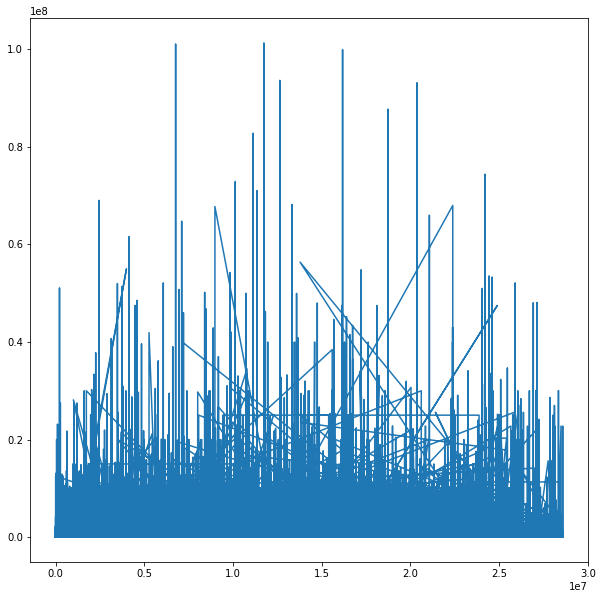

In [83]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.plot(purprd_prodcl.구매금액)

plt.show()

In [27]:
purprd_prodcl[(purprd_prodcl.중분류코드==801)&(purprd_prodcl.제휴사=='A')].sort_values(by='구매금액')

,제휴사,영수증번호,대분류코드,중분류코드,소분류코드,고객번호,점포코드,구매일자,구매시간,구매금액,중분류명,소분류명
2280510,A,2168330,8,801,A080125,791,15,20140618,14,200,명품,어덜트
10863537,A,5200634,8,801,A080116,13376,1,20150930,13,250,명품,명품시계기타
11416646,A,1761628,8,801,A080125,6282,20,20140417,19,400,명품,어덜트
19329805,A,3283936,8,801,A080102,6652,31,20141210,20,450,명품,수입잡화
20623383,A,5195836,8,801,A080125,2051,7,20150929,19,600,명품,어덜트
...,...,...,...,...,...,...,...,...,...,...,...,...
24197281,A,4573361,8,801,A080107,2290,1,20150624,13,74410000,명품,명품잡화보석
18734122,A,4593637,8,801,A080110,13376,1,20150627,16,87769260,명품,디자이너
16177915,A,1677262,8,801,A080106,14323,6,20140405,16,99960000,명품,명품잡화
6767459,A,1500785,8,801,A080106,14323,6,20140307,14,101110000,명품,명품잡화


In [28]:
purprd_prodcl.sort_values(by='구매금액', ascending=False).head(20)

,제휴사,영수증번호,대분류코드,중분류코드,소분류코드,고객번호,점포코드,구매일자,구매시간,구매금액,중분류명,소분류명
11744343,A,1416069,8,801,A080106,14323,6,20140221,14,101330000,명품,명품잡화
6767459,A,1500785,8,801,A080106,14323,6,20140307,14,101110000,명품,명품잡화
16177915,A,1677262,8,801,A080106,14323,6,20140405,16,99960000,명품,명품잡화
12640134,A,5526155,1,109,A010901,7801,1,20151120,13,93654000,주류,주류
20371265,A,3569101,5,503,A050308,17129,4,20150123,18,93166350,트래디셔널,타미힐피거상품군
18734122,A,4593637,8,801,A080110,13376,1,20150627,16,87769260,명품,디자이너
11137778,A,2220608,2,203,A020303,8079,1,20140627,10,82800000,화장품,색조 화장품
24197281,A,4573361,8,801,A080107,2290,1,20150624,13,74410000,명품,명품잡화보석
24197280,A,4573360,8,801,A080107,2290,1,20150624,13,74410000,명품,명품잡화보석
10128719,A,1862939,8,801,A080106,14323,6,20140503,15,72915000,명품,명품잡화


In [29]:
purprd_prodcl[purprd_prodcl.고객번호==14323].sort_values(by='구매금액', ascending=False)

,제휴사,영수증번호,대분류코드,중분류코드,소분류코드,고객번호,점포코드,구매일자,구매시간,구매금액,중분류명,소분류명
11744343,A,1416069,8,801,A080106,14323,6,20140221,14,101330000,명품,명품잡화
6767459,A,1500785,8,801,A080106,14323,6,20140307,14,101110000,명품,명품잡화
16177915,A,1677262,8,801,A080106,14323,6,20140405,16,99960000,명품,명품잡화
10128719,A,1862939,8,801,A080106,14323,6,20140503,15,72915000,명품,명품잡화
4595938,A,1277303,8,801,A080106,14323,6,20140125,14,48540000,명품,명품잡화
...,...,...,...,...,...,...,...,...,...,...,...,...
27556823,B,7956700,21,2108,B210802,14323,26,20151031,15,400,종량제봉투,재사용봉투
23306876,B,7948721,21,2108,B210802,14323,26,20150227,12,400,종량제봉투,재사용봉투
11421432,C,7289233,17,1702,C170206,14323,205,20150818,10,400,청소욕실용품,종량제봉투
24686820,B,7942090,5,503,B050308,14323,26,20140802,17,400,열매채소,애호박


In [30]:
purprd_prodcl[purprd_prodcl.고객번호==14323].구매금액.sum()

441835751

## 거주지 매핑

In [31]:
 area_code = {10. : '서울특별시 강북구',
              13. : '서울특별시 도봉구',
              16. : '서울특별시 노원구',
              20. : '서울특별시 중랑구',
              24. : '서울특별시 동대문구',
              27. : '서울특별시 성북구',
              30. : '서울특별시 종로구',
              33. : '서울특별시 은평구',
              36. : '서울특별시 서대문구',
              39. : '서울특별시 마포구',
              43. : '서울특별시 용산구',
              45. : '서울특별시 중구',
              47. : '서울특별시 성동구',
              49. : '서울특별시 광진구',
              52. : '서울특별시 강동구',
              55. : '서울특별시 송파구',
              60. : '서울특별시 강남구',
              65. : '서울특별시 서초구',
              69. : '서울특별시 동작구',
              72. : '서울특별시 영등포구',
              75. : '서울특별시 강서구',
              79. : '서울특별시 양천구',
              82. : '서울특별시 구로구',
              85. : '서울특별시 금천구',
              87. : '서울특별시 관악구',
              100. : '경기도',
              210. : '인천광역시',
              240. : '강원도',
              270. : '충청북도',
              300. : '세종특별자치시',
              310. : '충청남도',
              340. : '대전광역시',
              360. : '경상북도',
              410. : '대구광역시',
              440. : '울산광역시',
              460. : '부산광역시',
              500. : '경상남도',
              540. : '전라북도',
              570. : '전라남도',
              610. : '광주광역시',
              630. : '제주특별자치도'
             }

In [32]:
# demo_area = demo['거주지역'].map(lambda x:area_code[float(x)])
demo_area = demo.replace({'거주지역':area_code})
demo_area

,고객번호,성별,연령대,거주지역
0,1,M,60세이상,서울특별시 강남구
1,2,M,60세이상,경기도
2,3,M,60세이상,서울특별시 은평구
3,4,F,60세이상,서울특별시 노원구
4,5,M,60세이상,경기도
...,...,...,...,...
19378,19379,F,20세~24세,서울특별시 동작구
19379,19380,F,20세~24세,서울특별시 마포구
19380,19381,F,40세~44세,부산광역시
19381,19382,F,45세~49세,부산광역시


### merge

In [33]:
member, demo, channel, competitor

(       고객번호  멤버십명    가입년월
 0        11  하이마트  201512
 1        21  하이마트  201506
 2        37  하이마트  201306
 3        43  하이마트  201403
 4        44  하이마트  201411
 ...     ...   ...     ...
 7451  19377    롭스  201411
 7452  19379    롭스  201412
 7453  19380    롭스  201412
 7454  19381   다둥이  201506
 7455  19383    롭스  201507
 
 [7456 rows x 3 columns],
         고객번호 성별      연령대   거주지역
 0          1  M    60세이상   60.0
 1          2  M    60세이상  100.0
 2          3  M    60세이상   33.0
 3          4  F    60세이상   16.0
 4          5  M    60세이상  100.0
 ...      ... ..      ...    ...
 19378  19379  F  20세~24세   69.0
 19379  19380  F  20세~24세   39.0
 19380  19381  F  40세~44세  460.0
 19381  19382  F  45세~49세  460.0
 19382  19383  F  25세~29세  500.0
 
 [19383 rows x 4 columns],
        고객번호           제휴사  이용횟수
 0         7  A_MOBILE/APP     4
 1        14  A_MOBILE/APP     1
 2        42  B_MOBILE/APP    23
 3        74  A_MOBILE/APP     1
 4        74  B_MOBILE/APP    30
 ...     ...           ..

In [35]:
demo.set_index('고객번호').join(member.set_index('고객번호'), on='고객번호').join(competitor.set_index('고객번호'), on='고객번호')

,성별,연령대,거주지역,멤버십명,가입년월,제휴사,경쟁사,이용년월
고객번호,,,,,,,,
1,M,60세이상,60.0,NaN,NaN,A,A01,201507.0
1,M,60세이상,60.0,NaN,NaN,A,A02,201504.0
1,M,60세이상,60.0,NaN,NaN,B,B01,201501.0
1,M,60세이상,60.0,NaN,NaN,B,B01,201502.0
1,M,60세이상,60.0,NaN,NaN,B,B01,201507.0
...,...,...,...,...,...,...,...,...
19379,F,20세~24세,69.0,롭스,201412.0,NaN,NaN,NaN
19380,F,20세~24세,39.0,롭스,201412.0,NaN,NaN,NaN
19381,F,40세~44세,460.0,다둥이,201506.0,NaN,NaN,NaN
